# Série temporal ERA5

## Importamos bibliotecas necessárias

In [65]:
import pandas as pd
import numpy as np

## Dados geográficos da nossa estação climática

In [66]:
## Lon, Lat, Elevação

AWS = [-58.613468, -62.235946, 194.5]

## Leitura de dataframe

In [67]:
ERA5_AWS = pd.read_csv('../data/ERA5_AWS_UTC.csv', delimiter='\t', index_col=['time'], 
                 parse_dates=['time'])
ERA5_AWS

,longitude,latitude,u10,v10,d2m,t2m,msl,z,sf,sp,ssrd,strd,tcc,tp
time,,,,,,,,,,,,,,
2010-01-01 00:00:00,-58.5,-62.25,-2.059832,-0.916029,269.13880,272.04446,99329.220,581.507,9.233691e-05,98590.84,291078.750,984048.40,1.000000,9.439094e-05
2010-01-01 01:00:00,-58.5,-62.25,-2.048415,-1.613193,269.40506,271.93866,99351.660,581.507,1.776837e-04,98611.97,92437.500,1004156.06,0.989929,1.869401e-04
2010-01-01 02:00:00,-58.5,-62.25,-1.658116,-1.964392,269.57492,271.79030,99348.240,581.507,2.221722e-04,98609.21,8200.125,981278.60,0.980010,2.331572e-04
2010-01-01 03:00:00,-58.5,-62.25,-1.129392,-2.011489,269.64703,271.70782,99335.310,581.507,2.634638e-04,98596.78,0.000,1002598.70,0.990051,2.746546e-04
2010-01-01 04:00:00,-58.5,-62.25,-0.618506,-1.804491,269.71918,271.68268,99315.310,581.507,2.505670e-04,98576.21,0.000,1012524.44,0.989990,2.537045e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-58.5,-62.25,6.732086,0.915616,270.15660,273.43658,101255.195,581.507,1.291046e-07,100507.64,2578226.500,874025.44,0.616819,0.000000e+00
2014-12-31 20:00:00,-58.5,-62.25,6.939195,0.744730,270.57904,273.42612,101267.650,581.507,3.441237e-07,100520.23,2102700.000,907008.94,0.608396,0.000000e+00
2014-12-31 21:00:00,-58.5,-62.25,7.195646,0.534956,270.93335,273.44937,101280.664,581.507,4.301546e-07,100533.75,1798211.500,871544.90,0.539057,0.000000e+00


## Vamos aplicar downscaling estatístico

In [68]:
g       = 9.80665
hgt_era = (ERA5_AWS['z'].values[0]/g)
hgt_aws = AWS[2]
print(hgt_era)
print(hgt_aws)
print(hgt_aws-hgt_era)

59.29721158601561
194.5
135.2027884139844


In [69]:
ERA5_AWS['t2m_corr'] = ERA5_AWS['t2m'].values + (hgt_aws - hgt_era) * (-1.0/100)
ERA5_AWS[['t2m', 't2m_corr']] = ERA5_AWS[['t2m', 't2m_corr']] - 273.16
ERA5_AWS

,longitude,latitude,u10,v10,d2m,t2m,msl,z,sf,sp,ssrd,strd,tcc,tp,t2m_corr
time,,,,,,,,,,,,,,,
2010-01-01 00:00:00,-58.5,-62.25,-2.059832,-0.916029,269.13880,-1.11554,99329.220,581.507,9.233691e-05,98590.84,291078.750,984048.40,1.000000,9.439094e-05,-2.467568
2010-01-01 01:00:00,-58.5,-62.25,-2.048415,-1.613193,269.40506,-1.22134,99351.660,581.507,1.776837e-04,98611.97,92437.500,1004156.06,0.989929,1.869401e-04,-2.573368
2010-01-01 02:00:00,-58.5,-62.25,-1.658116,-1.964392,269.57492,-1.36970,99348.240,581.507,2.221722e-04,98609.21,8200.125,981278.60,0.980010,2.331572e-04,-2.721728
2010-01-01 03:00:00,-58.5,-62.25,-1.129392,-2.011489,269.64703,-1.45218,99335.310,581.507,2.634638e-04,98596.78,0.000,1002598.70,0.990051,2.746546e-04,-2.804208
2010-01-01 04:00:00,-58.5,-62.25,-0.618506,-1.804491,269.71918,-1.47732,99315.310,581.507,2.505670e-04,98576.21,0.000,1012524.44,0.989990,2.537045e-04,-2.829348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-58.5,-62.25,6.732086,0.915616,270.15660,0.27658,101255.195,581.507,1.291046e-07,100507.64,2578226.500,874025.44,0.616819,0.000000e+00,-1.075448
2014-12-31 20:00:00,-58.5,-62.25,6.939195,0.744730,270.57904,0.26612,101267.650,581.507,3.441237e-07,100520.23,2102700.000,907008.94,0.608396,0.000000e+00,-1.085908
2014-12-31 21:00:00,-58.5,-62.25,7.195646,0.534956,270.93335,0.28937,101280.664,581.507,4.301546e-07,100533.75,1798211.500,871544.90,0.539057,0.000000e+00,-1.062658


### Vamos usar **`1D`** para calcular a média diária

<AxesSubplot:xlabel='time'>

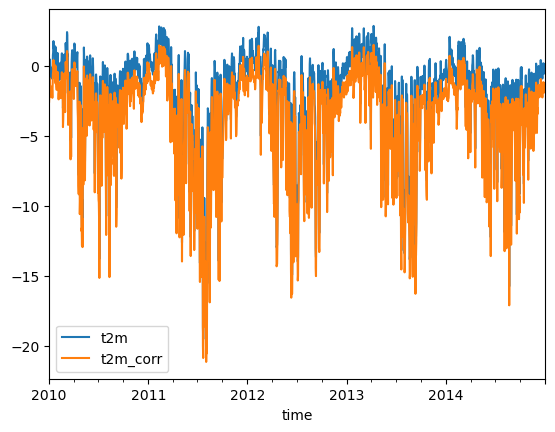

In [70]:
ERA5_AWS[['t2m', 't2m_corr']].resample('1D').mean().plot()

In [71]:
ERA5_AWS_T2 = ERA5_AWS[['t2m', 't2m_corr']].resample('1D').mean()
ERA5_AWS_T2

,t2m,t2m_corr
time,,
2010-01-01,-1.226237,-2.578265
2010-01-02,-0.773624,-2.125652
2010-01-03,-0.361098,-1.713126
2010-01-04,0.438718,-0.913310
2010-01-05,-0.811434,-2.163462
...,...,...
2014-12-27,-0.575283,-1.927311
2014-12-28,-0.092360,-1.444388
2014-12-29,0.017801,-1.334227


## Lemos nossos dados observados

In [72]:
filename = '../data/KGI_AWS_met_obs_V2.tab'
OBS_AWS = pd.read_csv(filename, delimiter='\t', index_col=['Date/Time'], 
                       parse_dates=['Date/Time'])
OBS_AWS.columns = ['HGT', 'T2', 'RH2', 'U2', 'G', 'RRR', 'SWU', 'SWnet', 
               'LWin', 'LWout', 'PRES', 'ALP', 'TS', 'CF']

In [73]:
OBS_AWS

,HGT,T2,RH2,U2,G,RRR,SWU,SWnet,LWin,LWout,PRES,ALP,TS,CF
Date/Time,,,,,,,,,,,,,,
2010-11-16 17:00:00,2,-0.14,93.70,17.43,399.8,0.0,153.9,246.0,291,304.0,952.4,0.79,-1.04,7
2010-11-16 18:00:00,2,-0.16,96.32,19.43,200.4,0.0,162.0,47.8,285,304.3,954.7,0.79,-1.04,7
2010-11-16 19:00:00,2,-0.18,96.42,19.23,112.9,0.0,91.1,32.6,283,302.9,953.7,0.78,-1.04,7
2010-11-16 20:00:00,2,-0.20,96.10,20.70,55.7,0.0,46.5,16.7,285,301.8,952.3,0.78,-1.04,7
2010-11-16 21:00:00,2,-0.53,96.65,19.43,21.0,0.0,23.3,-1.7,289,301.0,952.2,0.78,-1.04,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-18 12:00:00,2,-4.15,97.33,6.29,679.4,0.0,611.8,85.7,273,303.0,973.2,0.87,-1.09,8
2015-11-18 13:00:00,2,-4.10,97.56,6.24,676.1,0.0,608.8,84.3,273,303.2,973.2,0.87,-1.09,8
2015-11-18 14:00:00,2,-3.70,98.04,6.51,642.3,0.0,578.4,82.2,275,304.8,973.4,0.87,-1.09,8


In [74]:
OBS_AWS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43872 entries, 2010-11-16 17:00:00 to 2015-11-18 16:00:00
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HGT     43872 non-null  int64  
 1   T2      43872 non-null  float64
 2   RH2     43872 non-null  float64
 3   U2      43872 non-null  float64
 4   G       43872 non-null  float64
 5   RRR     43872 non-null  float64
 6   SWU     43872 non-null  float64
 7   SWnet   43872 non-null  float64
 8   LWin    43872 non-null  int64  
 9   LWout   43872 non-null  float64
 10  PRES    43872 non-null  float64
 11  ALP     43872 non-null  float64
 12  TS      43872 non-null  float64
 13  CF      43872 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 5.0 MB


In [75]:
OBS_AWS_T2 = OBS_AWS[['T2']].resample('1D').mean()
OBS_AWS_T2

,T2
Date/Time,
2010-11-16,-0.400000
2010-11-17,0.211667
2010-11-18,1.451250
2010-11-19,0.321250
2010-11-20,0.225000
...,...
2015-11-14,-4.184167
2015-11-15,-3.225833
2015-11-16,-2.283750


## Agora vamos montar os **`dataframes`**

In [76]:
T2_all = pd.merge(ERA5_AWS_T2, OBS_AWS_T2, how='left', left_index=True, right_index=True)
T2_all

,t2m,t2m_corr,T2
time,,,
2010-01-01,-1.226237,-2.578265,NaN
2010-01-02,-0.773624,-2.125652,NaN
2010-01-03,-0.361098,-1.713126,NaN
2010-01-04,0.438718,-0.913310,NaN
2010-01-05,-0.811434,-2.163462,NaN
...,...,...,...
2014-12-27,-0.575283,-1.927311,-1.337083
2014-12-28,-0.092360,-1.444388,-0.786667
2014-12-29,0.017801,-1.334227,-0.901250


Observe que a série temporal **ERA5** está sendo veiculada por ser mais completa!!

## Alterando nomes de colunas

In [77]:
T2_all.columns = ['ERA5', 'ERA5_corr', 'OBS']
T2_all

,ERA5,ERA5_corr,OBS
time,,,
2010-01-01,-1.226237,-2.578265,NaN
2010-01-02,-0.773624,-2.125652,NaN
2010-01-03,-0.361098,-1.713126,NaN
2010-01-04,0.438718,-0.913310,NaN
2010-01-05,-0.811434,-2.163462,NaN
...,...,...,...
2014-12-27,-0.575283,-1.927311,-1.337083
2014-12-28,-0.092360,-1.444388,-0.786667
2014-12-29,0.017801,-1.334227,-0.901250


<AxesSubplot:xlabel='time'>

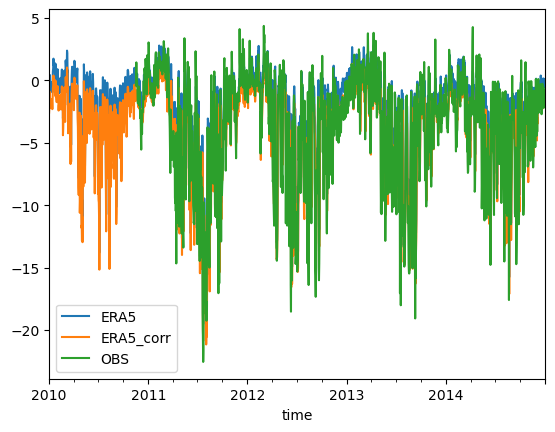

In [78]:
T2_all.plot()

## Correlação de dados

Vamos criar um dataframe que contenha apenas a temperatura observada e os dados ERA5. Além disso, vamos eliminar os valores ausentes.

In [79]:
temp2 = T2_all[['ERA5_corr', 'OBS']].dropna()
temp2.columns = ['MOD', 'OBS']
temp2

,MOD,OBS
time,,
2010-11-16,-1.621979,-0.400000
2010-11-17,-0.998045,0.211667
2010-11-18,-1.505580,1.451250
2010-11-19,-0.786590,0.321250
2010-11-20,-1.183673,0.225000
...,...,...
2014-12-27,-1.927311,-1.337083
2014-12-28,-1.444388,-0.786667
2014-12-29,-1.334227,-0.901250


## Importamos funções disponíveis em **`sklearn`** e **`scipy`**

In [80]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde

Declaramos duas variáveis ​​para facilitar posteriormente.

In [81]:
y1 = temp2['OBS'].values
y2 = temp2['MOD'].values

Criamos uma variável que contém as informações do índice e a tornamos aleatória. Além disso, vamos gerar uma variável com potência 10 para usar na figura de dispersão.

In [82]:
idxs = np.arange(len(y1))
np.random.shuffle(idxs)
n_toplot=10**10

Vamos redimensionar nossos vetores de temperatura observada e ERA5.

In [83]:
y_expected = y1.reshape(-1)[idxs[:n_toplot]]
y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

Criamos um novo array contendo os dados redimensionados.

In [84]:
xy = np.vstack([y_expected, y_predicted])
print(xy)

[[ -3.15375    -16.00791667  -3.70875    ...   2.57416667 -12.89958333
   -1.45291667]
 [ -3.79626913 -13.03480413  -4.80514455 ...   0.54556253  -6.59941455
   -1.09985663]]


Agora usamos a função **`gaussian_kde`** para estimar a densidade de nossos dados.

In [85]:
z = gaussian_kde(xy)(xy)

Classificamos os pontos por densidade, para que os pontos mais densos sejam plotados por último.

In [86]:
idx = z.argsort()
y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]

### Gere nosso valor de densidade de dispersão com base em sua densidade

In [87]:
import matplotlib.pyplot as plt

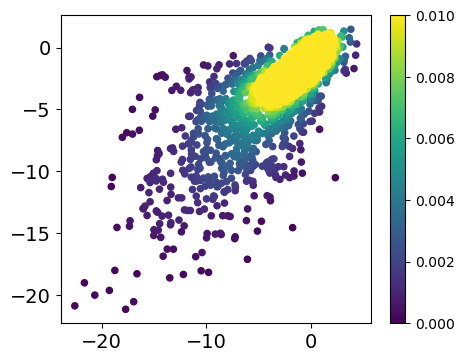

In [88]:
fig = plt.figure(figsize=(5,4))
sc = plt.scatter(y_plt, ann_plt, c=z, s=20)

# Agregamos colorbar y ajustamos de 0 a 0.14
plt.colorbar(sc)
plt.clim(0,0.01)
plt.tick_params(labelsize=14)


Vamos ver como está nossa figura!!

### Melhoramos nossa figura

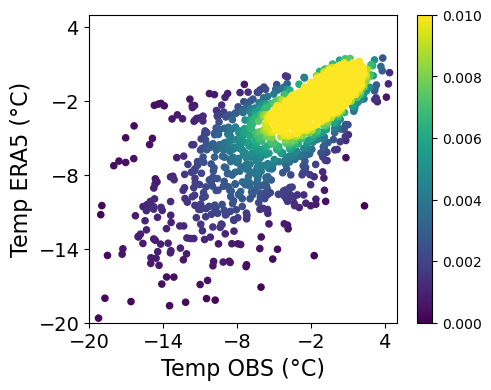

In [89]:
fig = plt.figure(figsize=(5,4))
sc = plt.scatter(y_plt, ann_plt, c=z, s=20)

# Adicionamos colorbar e ajustamos de 0 a 0.01
plt.colorbar(sc)
plt.clim(0,0.01)
plt.tick_params(labelsize=14)

# Adicionamos os rótulos aos eixos e fazemos ajustes
plt.ylabel('Temp ERA5 (°C)', fontsize=16)
plt.xlabel('Temp OBS (°C)', fontsize=16)

# Podemos colocar as etiquetas desejadas
plt.gca().set_box_aspect(1)
plt.xticks(np.arange(-20,30,6))
plt.yticks(np.arange(-20,30,6))
plt.xlim(-20, 5)
plt.ylim(-20, 5)

print('')

### Adicionamos a linha de regressão e alguns indicadores estatísticos

Criamos nosso modelo linear e um vetor que vai de 20°C a 20°C.

In [90]:
reg = LinearRegression().fit(y1.reshape(-1, 1),y2)
print(reg)
x_int = np.arange(-20,20,0.1)
print(x_int)

LinearRegression()
[-2.00000000e+01 -1.99000000e+01 -1.98000000e+01 -1.97000000e+01
 -1.96000000e+01 -1.95000000e+01 -1.94000000e+01 -1.93000000e+01
 -1.92000000e+01 -1.91000000e+01 -1.90000000e+01 -1.89000000e+01
 -1.88000000e+01 -1.87000000e+01 -1.86000000e+01 -1.85000000e+01
 -1.84000000e+01 -1.83000000e+01 -1.82000000e+01 -1.81000000e+01
 -1.80000000e+01 -1.79000000e+01 -1.78000000e+01 -1.77000000e+01
 -1.76000000e+01 -1.75000000e+01 -1.74000000e+01 -1.73000000e+01
 -1.72000000e+01 -1.71000000e+01 -1.70000000e+01 -1.69000000e+01
 -1.68000000e+01 -1.67000000e+01 -1.66000000e+01 -1.65000000e+01
 -1.64000000e+01 -1.63000000e+01 -1.62000000e+01 -1.61000000e+01
 -1.60000000e+01 -1.59000000e+01 -1.58000000e+01 -1.57000000e+01
 -1.56000000e+01 -1.55000000e+01 -1.54000000e+01 -1.53000000e+01
 -1.52000000e+01 -1.51000000e+01 -1.50000000e+01 -1.49000000e+01
 -1.48000000e+01 -1.47000000e+01 -1.46000000e+01 -1.45000000e+01
 -1.44000000e+01 -1.43000000e+01 -1.42000000e+01 -1.41000000e+01
 -1.40

Calculamos coeficiente de determinação, viés e RMSE. Nós os salvamos em uma string.

In [91]:
from scipy import stats
import math

In [92]:
def sts_ind_SMB_dec(ds1):
    ds1 = ds1.dropna()
    ds1.columns = ['OBS', 'SIM']
    r  = stats.pearsonr(ds1['OBS'], ds1['SIM'])[0]
    MBE = np.mean(ds1['SIM'] - ds1['OBS']) 
    MSE  = np.square(np.subtract(ds1['OBS'], ds1['SIM'])).mean() 
    RMSE = math.sqrt(MSE)

    textstr = '\n'.join((
    r'$r=%.2f$' % (r, ),
    r'$Bias=%.2f$' % (MBE, ),
    r'$RMSE=%.2f$' % (RMSE, )))

    return textstr



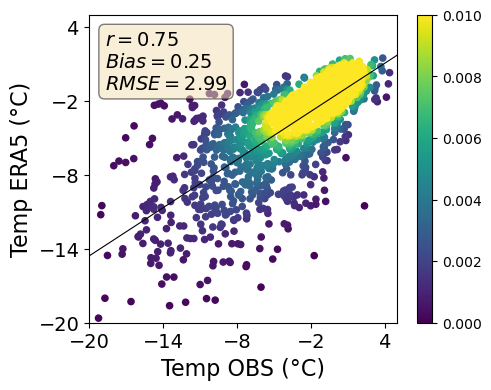

In [93]:
fig = plt.figure(figsize=(5,4))
sc = plt.scatter(y_plt, ann_plt, c=z, s=20)

plt.colorbar(sc)
plt.clim(0,0.01)
plt.tick_params(labelsize=14)

plt.ylabel('Temp ERA5 (°C)', fontsize=16)
plt.xlabel('Temp OBS (°C)', fontsize=16)

plt.gca().set_box_aspect(1)
plt.xticks(np.arange(-20,30,6))
plt.yticks(np.arange(-20,30,6))

plt.xlim(-20, 5)
plt.ylim(-20, 5)

# Adicionamos regressão linea
plt.plot(x_int, reg.intercept_ + reg.coef_ * x_int, linewidth=0.8, color='k', linestyle ='-')

# Vamos adicionar uma caixa para mostrar os indicadores estatísticos. Aqui configuramos as propriedades da caixa
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Agora podemos adicionar nossos indicadores estatísticos
plt.text(0.05, 0.95, sts_ind_SMB_dec(temp2), transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Finalmente salvamos nossa figura
fig.savefig('fig/Temp_corr_1963_2020.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)